This note page is try to plot the price path of 0050 ETF and compute some
empirical statics . The input data is from [TWSE/Daily Trading Value/Volume of Individual Securities => 0050](https://www.twse.com.tw/zh/trading/historical/stock-day.html) .

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

### Data import
Data includes the daily prices from 2023/1/1 ~2023/9/15 . It might be better to use web crawler to automatically download more data
which is better for the accuracy , but I haven't learn such skill . So I can only download the file one by one manually .

In [68]:
data_list = ["input data/STOCK_DAY_0050_20230%d.csv" %month for month in range(1,10)]
ETF_50 = pd.DataFrame()
for data in data_list :
    ETF_50=pd.concat([ETF_50 ,pd.read_csv( data , header = 1 , encoding = "utf-8") ] ,
                    ignore_index = True)
#header : start from n-th row of csv file (n=0 , same)
ETF_50

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,112/01/03,"15,272,877","1,673,263,794",109.60,110.9,108.45,110.75,0.55,"13,899"
1,112/01/04,"14,211,742","1,569,704,151",110.30,110.8,110.10,110.50,-0.25,"11,908"
2,112/01/05,"12,395,862","1,379,134,974",111.25,111.7,110.95,111.30,0.8,"10,075"
3,112/01/06,"11,826,560","1,321,964,557",111.20,112.2,111.15,111.80,0.5,"9,838"
4,112/01/09,"15,649,173","1,796,709,538",114.00,115.8,113.90,115.80,4,"16,946"
...,...,...,...,...,...,...,...,...,...
207,說明:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,符號說明:+/-/X表示漲/跌/不比價,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,當日統計資訊含一般、零股、盤後定價、鉅額交易，不含拍賣、標購。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,ETF證券代號第六碼為K、M、S、C者，表示該ETF以外幣交易。,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#clear NaN 
ETF_50= ETF_50.dropna(ignore_index=True)

### Plotting the path

In [83]:
price_array = np.array([])
days = len(ETF_50.index)
for t in range(days) :
    price_in_a_day = [ETF_50.loc[t , "開盤價" ] ,ETF_50.loc[t ,  "收盤價"] ] # two prices (opening/closing) per day
    price_array = np.append(price_array , price_in_a_day)

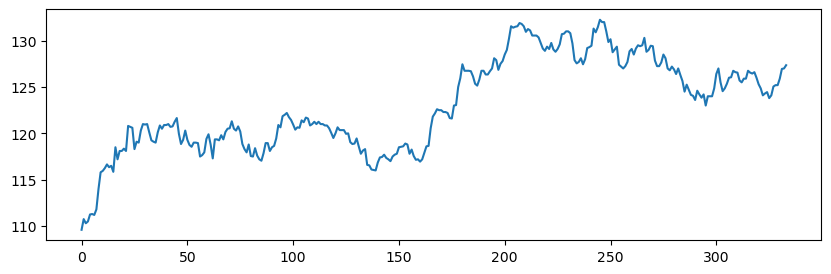

In [95]:
plt.figure(figsize=(10,3))
plt.plot(price_array )

We can compare graph screenshoted from google :
<img src="input data/0050_path.jpg" style="width:1000px;height:300px"/>        

Or we can plot opening/max/min/closing prices respectively via ```pandas.DataFrame.plot``` .

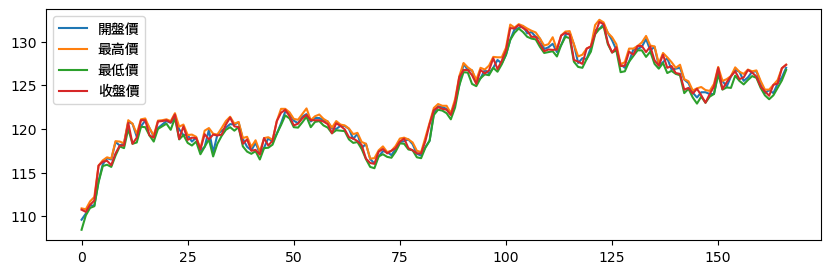

In [137]:
from matplotlib.font_manager import FontProperties

font = FontProperties(fname=r'NotoSansTC-Medium.ttf')
ETF_50[['開盤價','最高價','最低價','收盤價']].plot(figsize=(10,3))
plt.legend(prop=font)

### Price statistcs

(array([  2.,  10.,  22.,  51., 122.,  73.,  36.,  10.,   4.,   3.]),
 array([-0.01925551, -0.01506829, -0.01088107, -0.00669385, -0.00250662,
         0.0016806 ,  0.00586782,  0.01005504,  0.01424227,  0.01842949,
         0.02261671]),
 <BarContainer object of 10 artists>)

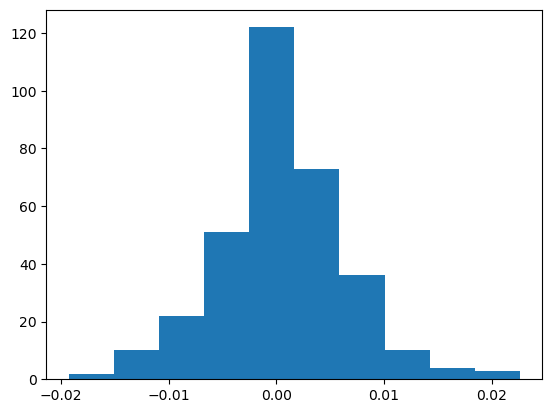

In [102]:
#define log return
log_price_array = np.log(price_array)
r_array = np.diff( log_price_array)
plt.hist(r_array)

Text(0.5, 0, 'time')

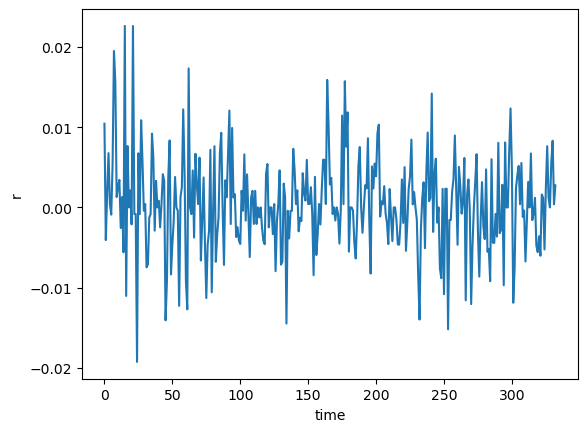

In [196]:
#plot the return as function of time
plt.plot(r_array )
plt.ylabel("r")
plt.xlabel("time")

In [118]:
#table of statics of log return , may not be reliable due to the lack of data and the assumption that log returns are i.i.d
pd.DataFrame(  {"mean" : [np.mean(r_array)] ,
"var" : [np.var(r_array)]  ,
"med" : [np.median(r_array)] ,
"skew" : [sci.stats.skew(r_array)] ,
"kur" : [sci.stats.kurtosis(r_array)] } , index =["values"] )

,mean,var,med,skew,kur
values,0.000451,0.000035,0.0,0.268572,1.486


#### Specify volatility clustering
Compute 
$$
C_2(k) \equiv Cor( \lvert r(t )\rvert^2 , \lvert r(t+k )\rvert^2)
$$

#### Autocorrelation(assume stationarity?)
[(ref)](https://www.geeksforgeeks.org/how-to-calculate-autocorrelation-in-python/)
Indeed , as we can see , prices are more uncorrelated as time difference grows .

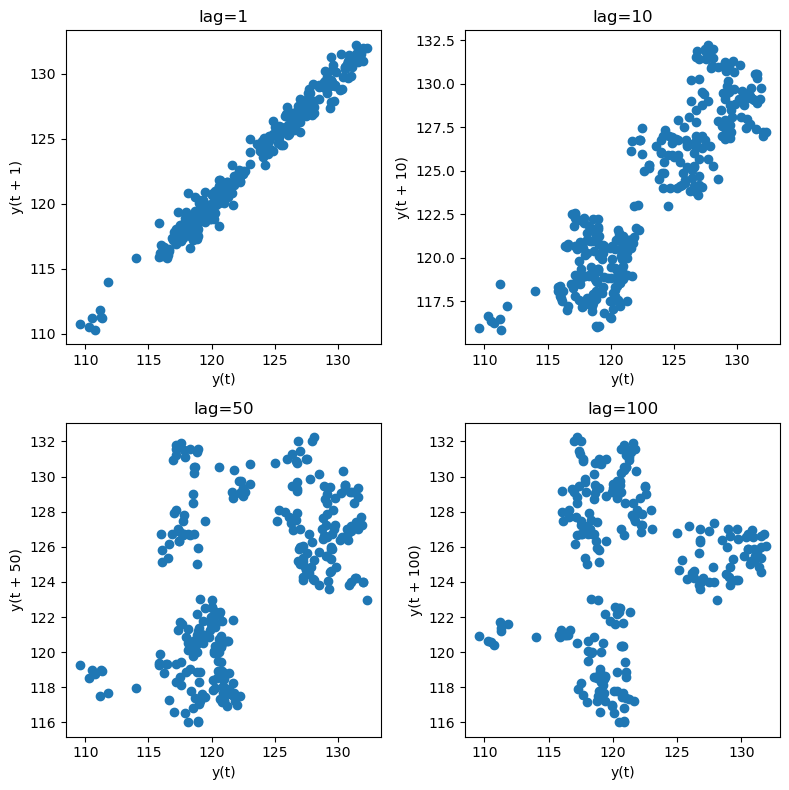

In [166]:
fig , ax =plt.subplots(2,2 , figsize=(8,8))
s = pd.Series(price_array)
pd.plotting.lag_plot(s, lag=1 ,ax= ax[0,0] , )
ax[0,0].set_title("lag=1")
pd.plotting.lag_plot(s, lag=10 ,ax= ax[0,1])
ax[0,1].set_title("lag=10")
pd.plotting.lag_plot(s, lag=50 ,ax= ax[1,0])
ax[1,0].set_title("lag=50")
pd.plotting.lag_plot(s, lag=100 ,ax= ax[1,1])
ax[1,1].set_title("lag=100")
plt.tight_layout()

(-0.1, 1.1)

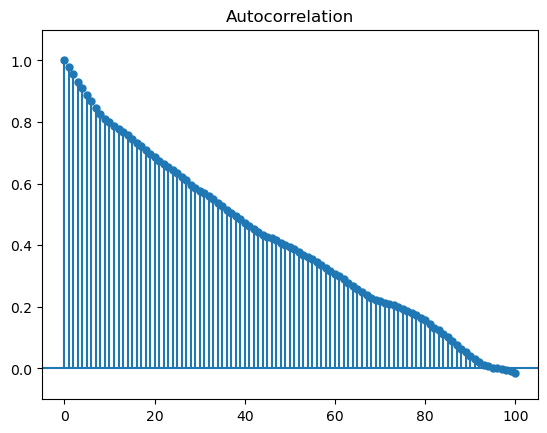

In [187]:
#plot acf as function of lag
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(price_array , lags=np.arange(101) ,alpha=None )
plt.ylim(-0.1,1.1)


#### Stylic fact?